#Test data trajectory analysis

To generate synthetic sequences we need "paths" that control the movement of the object in the scene. The most obvious source for a generative model for "natural" paths are the test sequences inside the tracking datasets. 

The are many ways to analyze this data. We will try some of these alternatives, starting by a mapping to our synthetic generation model i.e. 5 degrees of freedom (DOF) corresponding to rotation, scaling and translation. The first point analyzed was that as the ground truth bounding boxes are axis-aligned, it is difficult to infer rotation information directly from the box. Therefore, our first visualizations belong to only scaling and translation transformations i.e. 4 DOF.

In [16]:
#Helper functions

def read_gt(gtPath):
    gtFile = open(gtPath, 'r')
    lines = gtFile.readlines()
    #TODO: better replacement of whitespace
    gt = [map(float, line.strip().replace(',', ' ').split()) for line in lines]
    gtFile.close()
    return gt

In [17]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [18]:
from PIL import Image, ImageDraw
import numpy
import os
import matplotlib
import matplotlib.pyplot

In [19]:
gtPath = '/home/fmpaezri/datasets/vot-challenge/sequences/motocross//groundtruth.txt'
gt = read_gt(gtPath)

In [20]:
frameSize = Image.open(os.path.join(os.path.dirname(gtPath), '00000001.jpg')).size

In [21]:
image = Image.new('RGBA', frameSize)
canvas = ImageDraw.ImageDraw(image)

In [22]:
for box in gt[:20]:
    canvas.polygon(box)

In [23]:
image.show()

In [24]:
def transform_params(transform):
    x = transform[0,-1]
    y = transform[1,-1]
    ratio = transform[0,0]/transform[1,1]
    cos = numpy.sqrt(1-transform[0,1]**2)
    sx = numpy.abs(transform[0,0]/cos)
    sy = numpy.abs(transform[1,1]/cos)
    theta = numpy.arctan2(transform[0,1],(transform[0,0]/sx))
    return x,y,sx,sy,theta

In [25]:
refPoints = numpy.reshape(gt[0], (4,2)).T
refPoints = numpy.vstack([refPoints, numpy.ones((1,refPoints.shape[1]))])

In [26]:
path = numpy.empty((0,5))
for i in range(1,len(gt)):
    points = numpy.reshape(gt[i], (4,2)).T
    points = numpy.vstack([points, numpy.ones((1,points.shape[1]))])
    transform = numpy.dot(points, numpy.linalg.pinv(refPoints))
    path = numpy.vstack([path, transform_params(transform)])

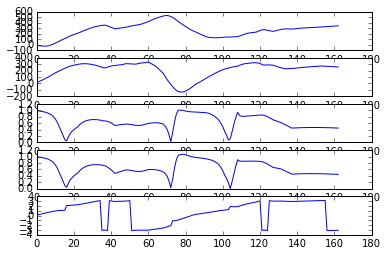

In [27]:
for i in range(path.shape[1]):
    matplotlib.pyplot.subplot(path.shape[1],1,i+1)
    matplotlib.pyplot.plot(path[:,i])

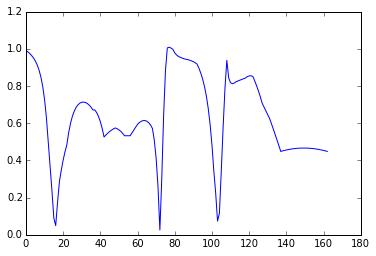

In [28]:
matplotlib.pyplot.plot(path[:,2])

In [29]:
numpy.argsort(path[:,2])

array([ 72,  16, 103,  15, 104,  17, 102,  14,  71,  18,  73, 105, 101,
        19,  13,  20,  70,  21, 137, 162, 161, 138, 160, 139, 159, 140,
       158, 141, 157, 142, 156, 143, 155, 144, 154, 145, 153, 146, 152,
       147, 151, 148, 150, 149, 136, 100,  22,  12, 135,  69,  42,  56,
        54,  53,  55,  43, 134,  52,  44,  57,  23,  45,  51,  46,  58,
        50, 133,  47,  49,  41,  68,  48, 106,  59,  67,  60,  99, 132,
        24,  66,  61,  40,  62,  65,  63,  64, 131,  11,  39,  74,  25,
       130,  38,  26, 129,  37,  36,  98,  27,  35, 128,  34,  28,  33,
       127,  29,  32,  30,  31,  10, 126,  97, 125, 107,  96,   9, 124,
       111, 112, 110, 113, 123, 114, 115, 116,  95, 117, 109, 118,   8,
       119, 122, 120, 121,  94,  75,   7,  93,   6,  92,  91,  90,   5,
        89, 108,  88,  87,  86,  85,  84,   4,  83,  82,   3,  81,   2,
        80,   1,   0,  79,  78,  76,  77])

In [30]:
gt[12:20]

[[194.81, -1.12, 292.31, 58.6, 230.67, 159.22, 133.18, 99.51],
 [193.62, -0.1, 295.77, 49.24, 244.88, 154.6, 142.73, 105.26],
 [192.4, 7.88, 297.11, 49.09, 254.69, 156.87, 149.97, 115.66],
 [191.45, 16.23, 298.1, 49.22, 264.21, 158.77, 157.57, 125.78],
 [190.82, 24.96, 298.75, 49.65, 273.43, 160.29, 165.5, 135.6],
 [190.52, 34.01, 299.1, 50.42, 282.31, 161.49, 173.73, 145.08],
 [190.57, 43.37, 299.17, 51.53, 290.84, 162.38, 182.24, 154.22],
 [191.0, 53.0, 299.0, 53.0, 299.0, 163.0, 191.0, 163.0]]